## Prophet Implementation
O pacote e todas suas dependências podem ser instaladas através do pip, sendo recomendado instalar dois pacotes antes:

In [5]:
#!pip install pystan
#!pip install plotly
#!pip install fbprophet

O prophet segue o modelo de API do sklearn. Cria-se uma instância da classe prophet e depois são chamados seus métodos de ajuste e previsão. A entrada para o Prophet é sempre um dataframe com duas colunas:

datas (ds) – em um formato esperado pelos Pandas, idealmente AAAA-MM-DD para uma data ou AAAA-MM-DD HH: MM: SS para um registro de data e hora;
dados (y) – numérica e representando a medida que deve ser prevista.
As colunas devem se chamar “ds” para as datas e “y” para os dados. Um arquivo de exemplo é dado pelo tutorial (link no fim do post).

As previsões são então feitas em um dataframe com uma coluna contendo as datas para as quais uma predição deve ser feita. Você pode obter um dataframe que estenda para o futuro um número específico de dias usando o método auxiliar “Prophet.make_future_dataframe”. Por padrão, ele também incluirá as datas do histórico, o que é útil para observar também o ajuste do modelo.

Veja um exemplo de implementação completa no GitHub (script prophet_simple.py).

A saída da previsão será uma dataframe contendo as seguintes colunas, cada uma com seus respectivos limites inferior e superior:

ds – data com o modelo calculado (pode ser observado ou previsto)
yhat – valor calculado
trend – tendência
additive_terms – termos aditivos
weekly – sazonalidade semanal
yearly – sazonalidade anual
multiplicative_terms – termos multiplicativos
É possível fazer um gráfico contendo a série observada junto com a modelada e sua previsão, contendo os limites superior e inferior de incertezas, simplesmente chamando o método “Prophet.plot”. Também pode-se fazer um gráfico contendo as componentes da previsão através do método “Prophet.plot_components” – tendência e componentes sazonais anual e semanal.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds      yhat  yhat_lower  yhat_upper
3653 2018-01-01 -0.142487   -1.374324    1.121806


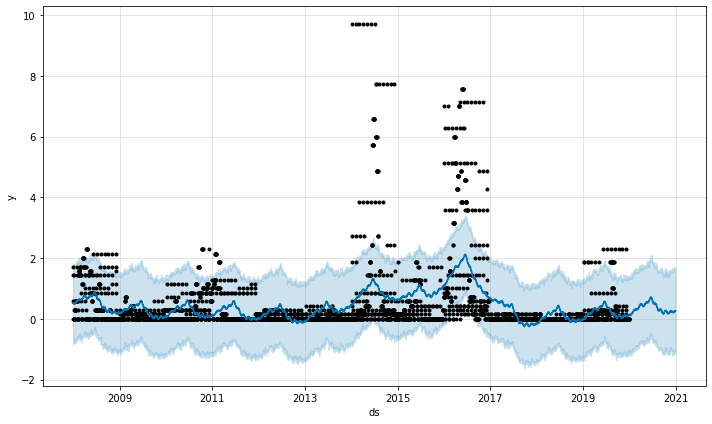

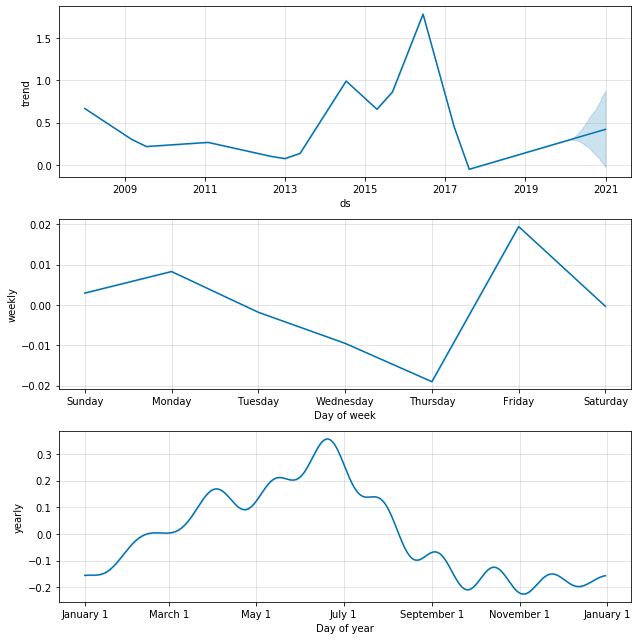

In [11]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Prophet example (simple)

import pandas as pd
from fbprophet import Prophet

# Import the data
df = pd.read_csv('./Sobral/Sobral_Infectados_Diario_Sem2007.csv',sep=",")
# Rename columns
df.columns = ['ds', 'y']

# Define interval dates
last_obs_day = '2017-12-31'
last_prev_day = '2018-01-01'

# Instant a new Prophet object
m = Prophet()
# Fit model to data
m.fit(df)
# Define number of days to forecast
future = m.make_future_dataframe(periods=365)
# Calculate forecast
forecast = m.predict(future)

# Save all calculated values into CSV file
forecast.to_csv('forecast.csv', index=False)
# Print first 5 forecasted values (today + 4 days)
forecast_select = forecast[(forecast['ds'] > last_obs_day) & (forecast['ds'] <= last_prev_day)]
print(forecast_select[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot graphics
m.plot(forecast).savefig('model_forecast.png')
m.plot_components(forecast).savefig('components_forecast.png')

Primeiro gráfico acima - Exemplo de gráfico contendo valores observados (pontos pretos), modelados (traço azul escuro) e intervalos de incerteza (mancha azul claro).